# Comparision between Models

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from Utils import ReadEncoderData, ReadRegressorData
from Utils import resnet18_model_runner_get_basic_models
from Utils import resnet18_baseline_model_runner_get_basic_model
from Utils import shufflenetv2_x1_model_runner_get_basic_model
from Utils import model_runner_interface
from Utils import sklearn_regression_model_runner
from Utils import cnnregression_model_runner_get_basic_models

def GetRegressorDataAsDict(path : str):
    epochs, mse, vmse, vr2 = ReadRegressorData(path)
    
    return {
        'Epochs' : epochs,
        'TMSE'   : mse,
        'VMSE'   : vmse,
        'VR2'    : vr2
    }

def get_color(key):
    contrastive_models = [
        'resnet18_64',
        'resnet18_256',
        'resnet18_512',
        'resnet18_64d',
        'shufflenetv2_64',
        'shufflenetv2_128',
        'efficientnet_b0_64'
    ]
    if key in contrastive_models:
        return 'orange'
    else:
        return 'blue'

### Load Contrastive Models

## Regressor Loss

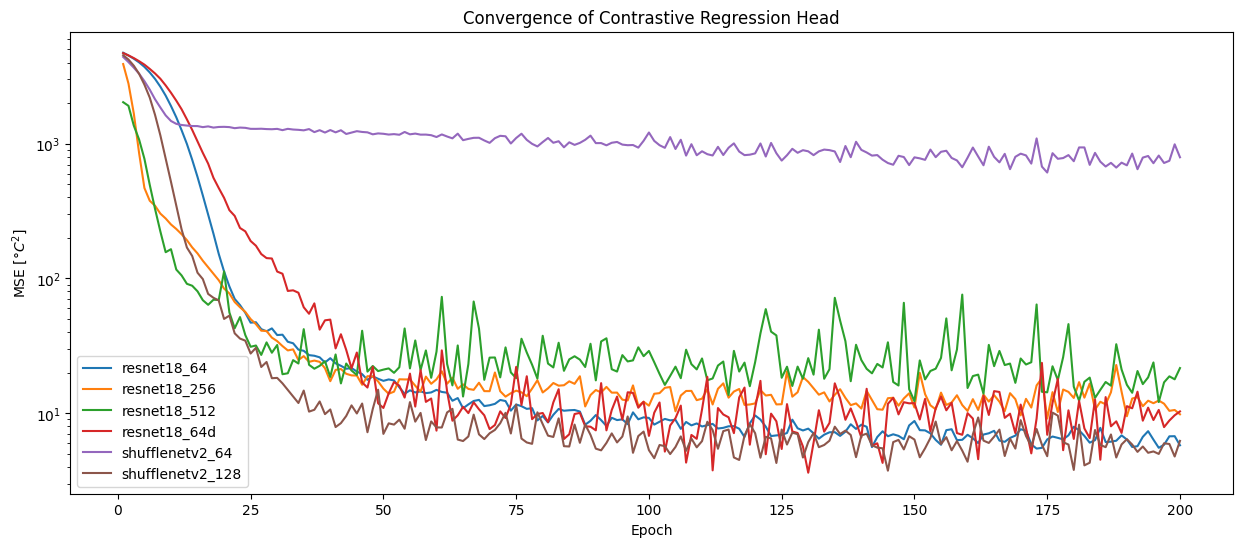

In [35]:
Models = {}
Models['resnet18_64'] = GetRegressorDataAsDict('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_256'] = GetRegressorDataAsDict('ConModels/Resnet18/1_400ep_256e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_512'] = GetRegressorDataAsDict('ConModels/Resnet18/4_400ep_512e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_64d'] = GetRegressorDataAsDict('ConModels/Resnet18/6_600ep_64e_r_200ep_1_t1.0_b256/Regressor')
Models['shufflenetv2_64'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_64e_r_200ep_1_t1.0_x1/Regressor')
Models['shufflenetv2_128'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_128e_r_200ep_1_t1.0_x1/Regressor')

epochs = 200
plt.figure(figsize=[15, 6])
plt.plot(
    np.array([
        np.arange(1, epochs+1) for _ in range(len(Models))
    ]).T,
    np.array([
        Models[key]['VMSE'][:epochs] for key, item in Models.items()
    ]).T
)
plt.title("Convergence of Contrastive Regression Head")
plt.xlabel("Epoch")
plt.ylabel(r"MSE $[\degree C^2]$")
plt.legend([key for key, _ in Models.items()])
plt.yscale("log")
plt.show()



## Encoder Loss

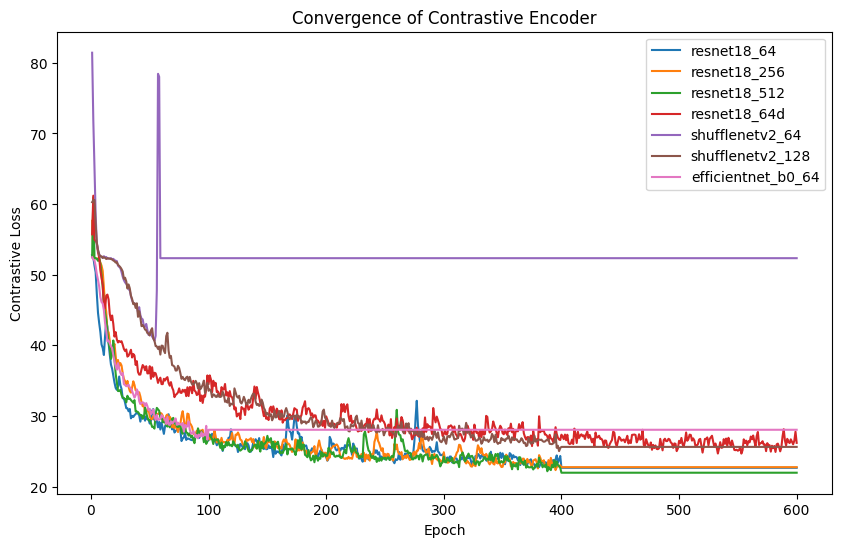

In [4]:
Models = {}
Models['resnet18_64'] = ReadEncoderData('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Encoder')
Models['resnet18_256'] = ReadEncoderData('ConModels/Resnet18/1_400ep_256e_r_200ep_1_t1.0_b128/Encoder')
Models['resnet18_512'] = ReadEncoderData('ConModels/Resnet18/4_400ep_512e_r_200ep_1_t1.0_b128/Encoder')
Models['resnet18_64d'] = ReadEncoderData('ConModels/Resnet18/6_600ep_64e_r_200ep_1_t1.0_b256/Encoder')
Models['shufflenetv2_64'] = ReadEncoderData('ConModels/ShuffleNetV2/1_400ep_64e_r_200ep_1_t1.0/Encoder')
Models['shufflenetv2_128'] = ReadEncoderData('ConModels/ShuffleNetV2/1_400ep_128e_r_200ep_1_t1.0/Encoder')
Models['efficientnet_b0_64'] = ReadEncoderData('ConModels/EfficientNetB0/1_100ep_64e_r_200ep_1/Encoder')

epochs = 600

def extend_data(dat):
    if len(dat) > epochs:
        return dat[:epochs]
    elif len(dat) == epochs:
        return dat
    else:
        return np.pad(dat, (0, epochs - len(dat)), mode='edge')

plt.figure(figsize=[10, 6])
plt.plot(
    np.array([
        np.arange(1, epochs+1) for _ in range(len(Models))
    ]).T,
    np.array([
         extend_data(item[1]) for key, item in Models.items()
    ]).T
)
plt.title("Convergence of Contrastive Encoder")
plt.xlabel("Epoch")
plt.ylabel("Contrastive Loss")
plt.legend([key for key, _ in Models.items()])
plt.show()

Most models have been extended to 600 epochs to be consistent. Only one model `resnet18_64d` has been trained up to 600 epochs, the reset have been trained to 400 epochs. Efficient Net B0 has been trained up to 100 epochs due to compute constraints.

## $R^2$

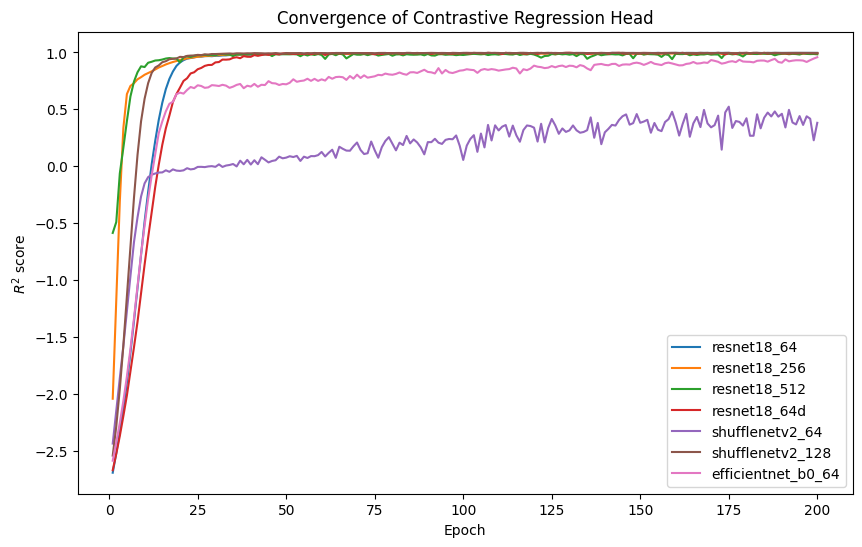

In [5]:
Models = {}
Models['resnet18_64'] = GetRegressorDataAsDict('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_256'] = GetRegressorDataAsDict('ConModels/Resnet18/1_400ep_256e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_512'] = GetRegressorDataAsDict('ConModels/Resnet18/4_400ep_512e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_64d'] = GetRegressorDataAsDict('ConModels/Resnet18/6_600ep_64e_r_200ep_1_t1.0_b256/Regressor')
Models['shufflenetv2_64'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_64e_r_200ep_1_t1.0/Regressor')
Models['shufflenetv2_128'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_128e_r_200ep_1_t1.0/Regressor')
Models['efficientnet_b0_64'] = GetRegressorDataAsDict('ConModels/EfficientNetB0/1_100ep_64e_r_200ep_1/Regressor')

epochs = 200
plt.figure(figsize=[10, 6])
plt.plot(
    np.array([
        np.arange(1, epochs+1) for _ in range(len(Models))
    ]).T,
    np.array([
        Models[key]['VR2'][:epochs] for key, item in Models.items()
    ]).T
)
plt.title("Convergence of Contrastive Regression Head")
plt.xlabel("Epoch")
plt.ylabel(r"$R^2$ score")
plt.legend([key for key, _ in Models.items()])
plt.show()

## Plot Mean Squared Error (MSE)

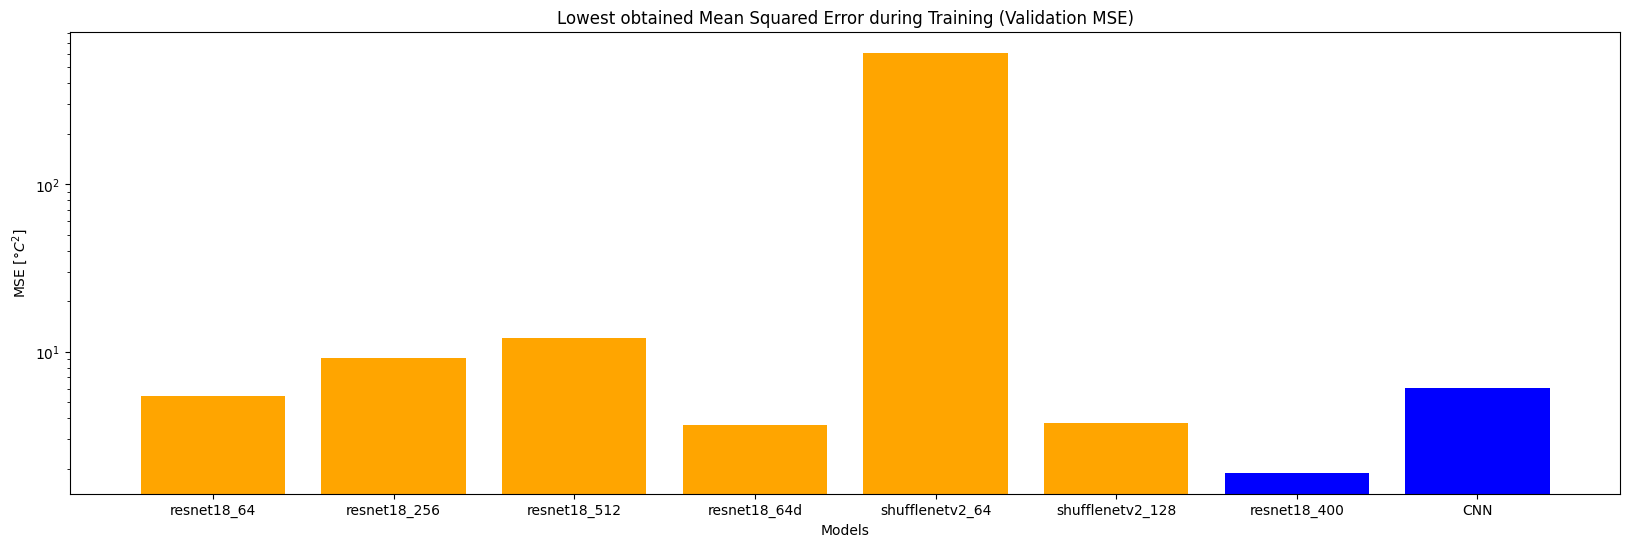

In [36]:
Models = {}
Models['resnet18_64'] = GetRegressorDataAsDict('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_256'] = GetRegressorDataAsDict('ConModels/Resnet18/1_400ep_256e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_512'] = GetRegressorDataAsDict('ConModels/Resnet18/4_400ep_512e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_64d'] = GetRegressorDataAsDict('ConModels/Resnet18/6_600ep_64e_r_200ep_1_t1.0_b256/Regressor')
Models['shufflenetv2_64'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_64e_r_200ep_1_t1.0_x1/Regressor')
Models['shufflenetv2_128'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_128e_r_200ep_1_t1.0_x1/Regressor')
Models['resnet18_400'] = GetRegressorDataAsDict('Resnet18_400')
Models['CNN'] = GetRegressorDataAsDict('CNN')
#Models['Linear Regression'] = {
#    'VMSE' : np.array([69.12810516357422]), # Obtained directly from Baseline_LinearRegression.ipynb
#    'RMSE' : np.array([8.3143310546875]),
#    'VR2'  : np.array([0.946037232875824])
#}
            

plt.figure(figsize=[20, 6])
plt.bar(
    [key for key, _ in Models.items()],
    np.array([
        np.min(Models[key]['VMSE']) for key, item in Models.items()
    ]).T,
    color=[get_color(key) for key, _ in Models.items()]
)
plt.title("Lowest obtained Mean Squared Error during Training (Validation MSE)")
plt.xlabel("Models")
plt.ylabel(r"MSE $[\degree C^2]$")
plt.yscale("log")
plt.show()

Lower is better

## Plot $R^2$ score

In [ ]:
Models = {}
Models['resnet18_64'] = GetRegressorDataAsDict('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_256'] = GetRegressorDataAsDict('ConModels/Resnet18/1_400ep_256e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_512'] = GetRegressorDataAsDict('ConModels/Resnet18/4_400ep_512e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_64d'] = GetRegressorDataAsDict('ConModels/Resnet18/6_600ep_64e_r_200ep_1_t1.0_b256/Regressor')
Models['shufflenetv2_128'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_128e_r_200ep_1_t1.0_x1/Regressor')
Models['resnet18e_400'] = GetRegressorDataAsDict('Resnet18_400')
Models['CNN']          = GetRegressorDataAsDict('CNN')

vr2_base = np.array([0.946037232875824])
plt.figure(figsize=[20, 6])
plt.bar(
    [key for key, _ in Models.items()],
    np.array([
        np.max(Models[key]['VR2']) for key, item in Models.items()
    ]).T,
    color=[get_color(key) for key, _ in Models.items()]
)
plt.title(r"Highest obtained $R^2$ during training")
plt.xlabel("Models")
plt.ylabel(r"$R^2$ score")
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3808755342.py, line 14)

Higher is better

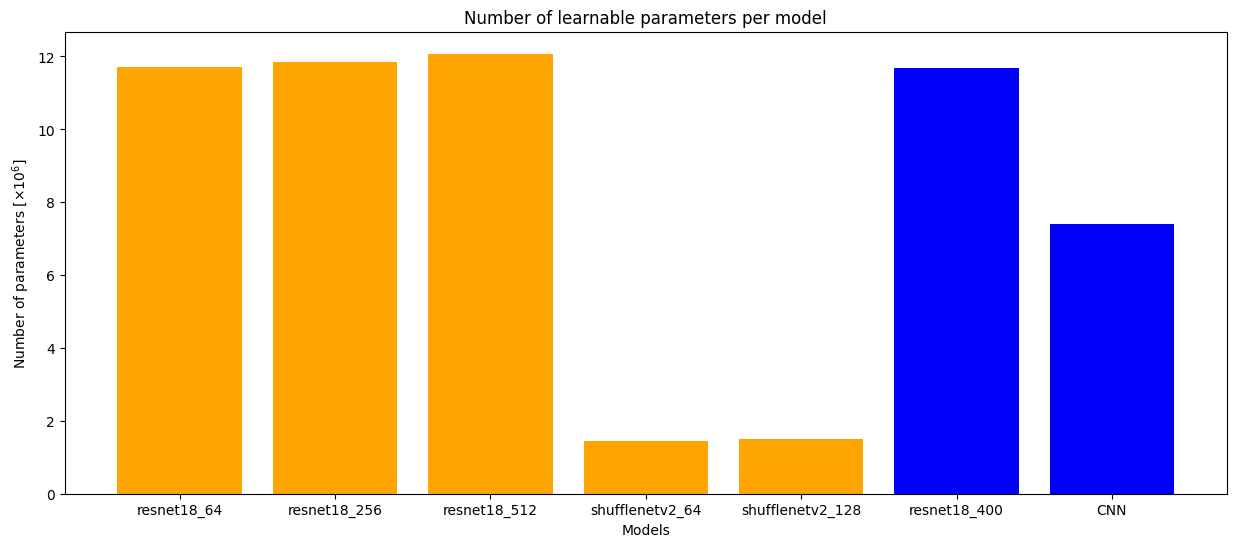

In [31]:
Models = {}
Models['resnet18_64']      = 11_683_240 + (512 * 64 + 64) + (64 * 32 + 32) + (32 * 1 + 1)
Models['resnet18_256']     = 11_683_240 + (512 * 256 + 256) + (256 * 128 + 128) + (128 * 1 + 1)
Models['resnet18_512']     = 11_683_240 + (512 * 512 + 512) + (512 * 256 + 256) + (256 * 1 + 1)
Models['shufflenetv2_64']  = 1_366_424  + (1000 * 64 + 64) + (64 * 32 + 32) + (32 * 1 + 1)
Models['shufflenetv2_128'] = 1_366_424  + (1000 * 128 + 128) + (128 * 64 + 64) + (64 * 1 + 1)
Models['resnet18_400']     = 11_683_240 + (512 * 1 + 1)
Models['CNN']              = 7_399_049
#Models['ann55m_reg']       = (126 * 126 * 2048 + 2048) + 4 * (2048 * 2048 + 2048) + (2048 * 1024 + 1024) + (1024 * 1024 + 1024) + (1024 * 64 + 64) + (64 * 1 + 1)

plt.figure(figsize=[15, 6])
plt.bar(
    [key for key, _ in Models.items()],
    np.array([
        Models[key] for key, item in Models.items()
    ]).T / 1e6,
    color=[get_color(key) for key, _ in Models.items()]
)
plt.title("Number of learnable parameters per model")
plt.xlabel("Models")
plt.ylabel(r"Number of parameters $[\times 10^6]$")
plt.show()

### Batch size

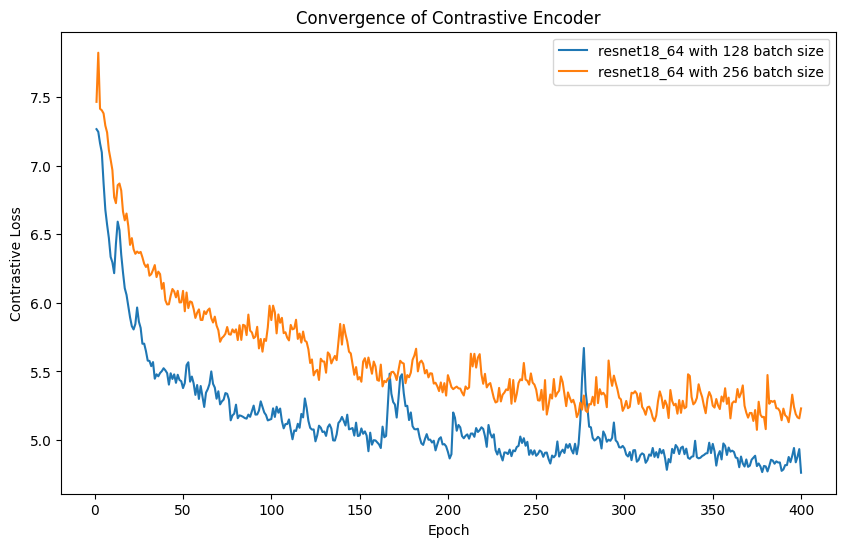

In [116]:
Models = {}
Models['resnet18_64 with 128 batch size'] = ReadEncoderData('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Encoder')
Models['resnet18_64 with 256 batch size'] = ReadEncoderData('ConModels/Resnet18/6_600ep_64e_r_200ep_1_t1.0_b256/Encoder')

epochs = 400
plt.figure(figsize=[10, 6])
plt.plot(
    np.array([
        np.arange(1, epochs+1) for _ in range(len(Models))
    ]).T,
    np.array([
        np.sqrt(Models[key][1])[:epochs] for key, item in Models.items()
    ]).T
)
plt.title("Convergence of Contrastive Encoder")
plt.xlabel("Epoch")
plt.ylabel("Contrastive Loss")
plt.legend([key for key, _ in Models.items()])
plt.show()

## Training Loss vs Validation Loss

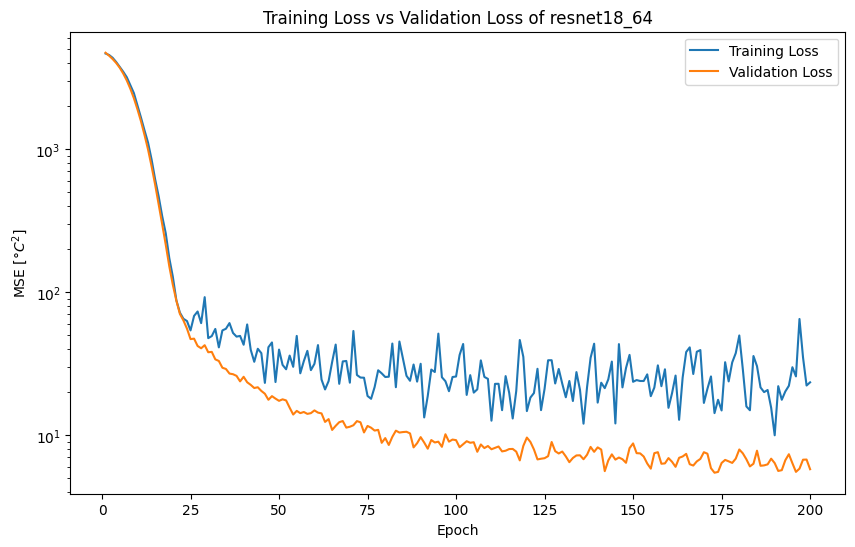

In [92]:
Models = {}
model_name = 'resnet18_64'
Models[model_name] = GetRegressorDataAsDict('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Regressor')

epochs = 200
plt.figure(figsize=[10, 6])
plt.plot(
    np.array([
        np.arange(1, epochs+1) for _ in range(2)
    ]).T,
    np.array([
        Models[model_name]['TMSE'][:epochs],
        Models[model_name]['VMSE'][:epochs]
    ]).T
)
plt.title(f"Training Loss vs Validation Loss of {model_name}")
plt.xlabel("Epoch")
plt.ylabel(r"MSE $[\degree C^2]$")
plt.yscale("log")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

### Predicted vs. Actual

Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
MSE: 2.9505412578582764


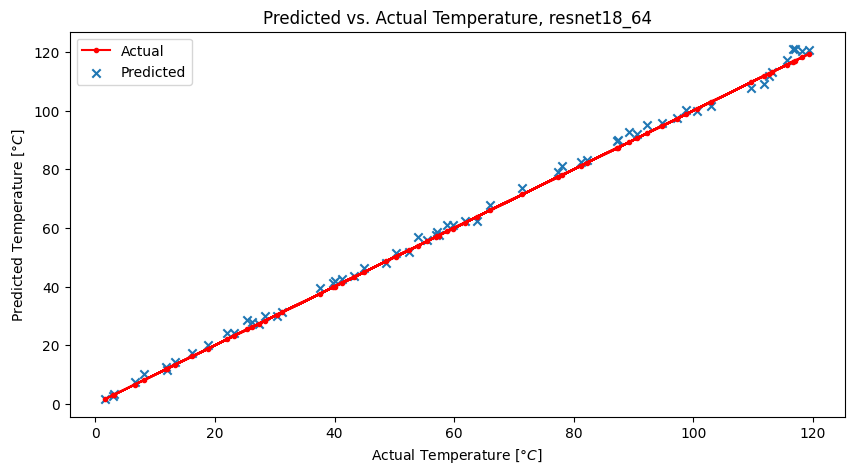

In [21]:
SupConModel, RegressionModel = resnet18_model_runner_get_basic_models()
y_pred, y_test = model_runner_interface('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Regressor/resnet18_regression_model3_c_400ep_64e_r_200ep_1.pth')

mse = ((y_pred - y_test) ** 2).mean()
print(f'MSE: {mse}')
plt.figure(figsize=[10, 5])
plt.plot(y_test, y_test, '.-', c='red')
plt.scatter(y_test, y_pred, marker='x')
plt.xlabel(r"Actual Temperature $[\degree C]$")
plt.ylabel(r"Predicted Temperature $[\degree C]$")
plt.title("Predicted vs. Actual Temperature, resnet18_64")
plt.legend(['Actual', 'Predicted'])
plt.show()


## Resnet18E_400

Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
MSE: 3.724259614944458


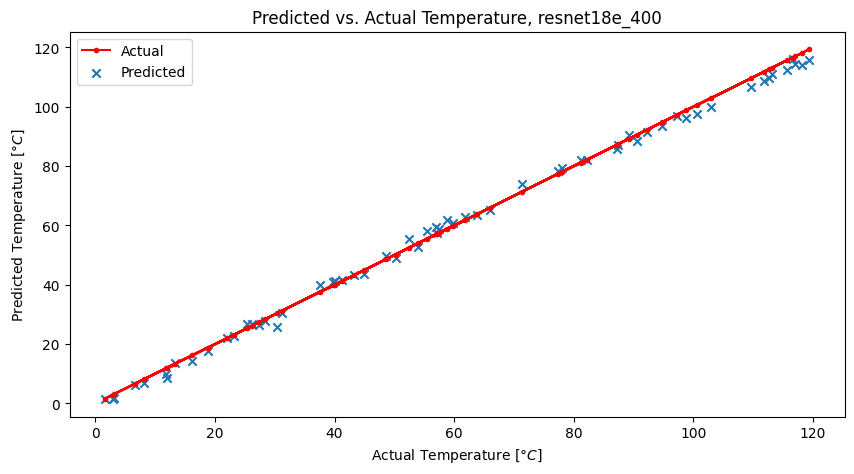

In [22]:
ResNet18E = resnet18_baseline_model_runner_get_basic_model()
y_pred, y_test = model_runner_interface('Resnet18_400/resnet18e_400.pth', noisy_dataset=False)

mse = ((y_pred - y_test) ** 2).mean()
print(f'MSE: {mse}')
plt.figure(figsize=[10, 5])
plt.plot(y_test, y_test, '.-', c='red')
plt.scatter(y_test, y_pred, marker='x')
plt.xlabel(r"Actual Temperature $[\degree C]$")
plt.ylabel(r"Predicted Temperature $[\degree C]$")
plt.title("Predicted vs. Actual Temperature, resnet18e_400")
plt.legend(['Actual', 'Predicted'])
plt.show()

### Average MSE

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

Models = {}
Nsamples   = 100

CNNRegression = cnnregression_model_runner_get_basic_models()
y_pred, y_test = model_runner_interface('CNN/cnn_net_400.pth', N=Nsamples)
Models['CNN']=(((y_pred - y_test) ** 2).mean())

ResNet18E = resnet18_baseline_model_runner_get_basic_model()
y_pred, y_test = model_runner_interface('Resnet18_400/resnet18e_400.pth', N=Nsamples)
Models['resnet18e_400']=(((y_pred - y_test) ** 2).mean())

SupConModel, RegressionModel = resnet18_model_runner_get_basic_models()
y_pred, y_test = model_runner_interface('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Regressor/resnet18_regression_model3_c_400ep_64e_r_200ep_1.pth', N=Nsamples)
Models['resnet18_64']=(((y_pred - y_test) ** 2).mean())

SupConModel, RegressionModel = resnet18_model_runner_get_basic_models()
y_pred, y_test = model_runner_interface('ConModels/Resnet18/1_400ep_256e_r_200ep_1_t1.0_b128/Regressor/resnet18_regression_model3_c_400ep_256e_r_200ep_1.pth', N=Nsamples)
Models['resnet18_256']=(((y_pred - y_test) ** 2).mean())

SupConModel, RegressionModel = resnet18_model_runner_get_basic_models()
y_pred, y_test = model_runner_interface('ConModels/Resnet18/4_400ep_512e_r_200ep_1_t1.0_b128/Regressor/resnet18_regression_model3_c_400ep_512e_r_200ep_1.pth', N=Nsamples)
Models['resnet18_512']=(((y_pred - y_test) ** 2).mean())

SupConModel, RegressionModel = shufflenetv2_x1_model_runner_get_basic_model()
y_pred, y_test = model_runner_interface('ConModels/ShuffleNetV2/1_400ep_128e_r_200ep_1_t1.0_x1/Regressor/shufflenetv2_regression_model_c_400ep_128e_r_200ep_1.pth', N=Nsamples)
Models['shufflenetv2_128']=(((y_pred - y_test) ** 2).mean())

y_pred, y_test = sklearn_regression_model_runner(LinearRegression(), N=Nsamples)
Models['linear regression']=(((y_pred - y_test) ** 2).mean())

y_pred, y_test = sklearn_regression_model_runner(SVR(kernel='linear'), N=Nsamples)
Models['svm']=(((y_pred - y_test) ** 2).mean())


Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1


In [41]:
folder = "AverageMSE"
for key, value in Models.items():
    np.save(f'{folder}/{key}_mse.npy', value)

C:\Users\tsope\AppData\Local\Temp\ipykernel_19648\4231822755.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 100))


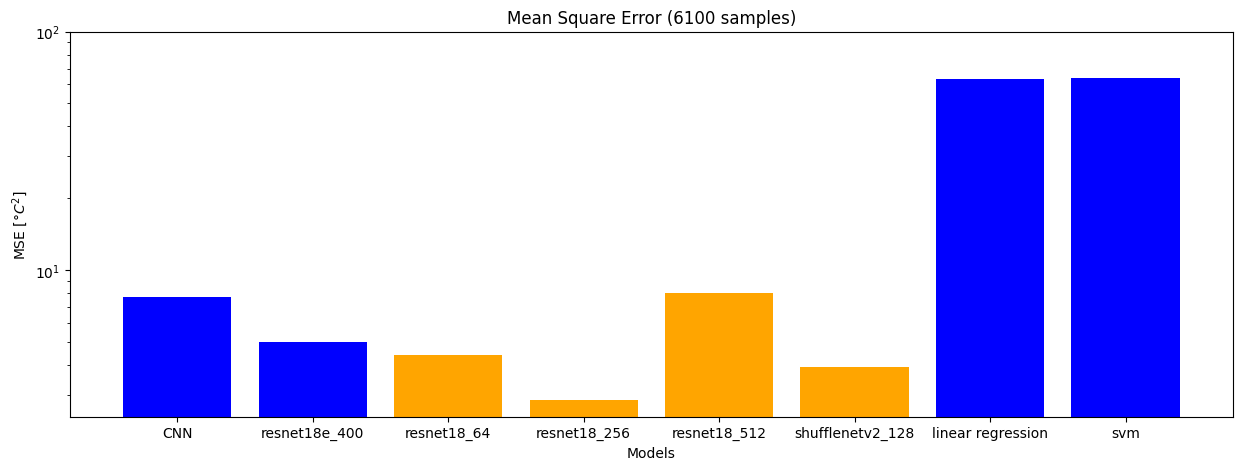

In [42]:
plt.figure(figsize=[15, 5])
plt.bar(
    [key for key, _ in Models.items()],
    [value for _, value in Models.items()],
    color=[get_color(key) for key, _ in Models.items()]
)
plt.title(f"Mean Square Error ({Nsamples*61} samples)")
plt.xlabel("Models")
plt.ylabel(r"MSE $[\degree C^2]$")
plt.yscale('log')
plt.ylim((0, 100))
plt.show()

C:\Users\tsope\AppData\Local\Temp\ipykernel_19648\2969730032.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 100))


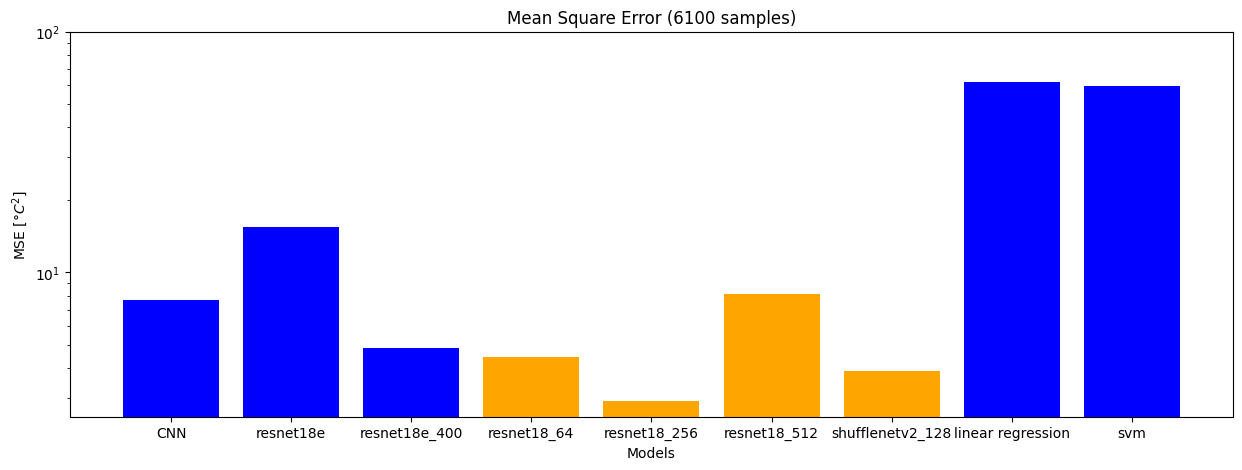

In [30]:
plt.figure(figsize=[15, 5])
plt.bar(
    [key for key, _ in Models.items()],
    [value for _, value in Models.items()],
    color=[get_color(key) for key, _ in Models.items()]
)
plt.title(f"Mean Square Error ({Nsamples*61} samples)")
plt.xlabel("Models")
plt.ylabel(r"MSE $[\degree C^2]$")
plt.yscale('log')
plt.ylim((0, 100))
plt.savefig('MSE.png')

In [9]:
Models = {}
Nsamples = 200
SupConModel, RegressionModel = resnet18_model_runner_get_basic_models()
y_pred, y_test = model_runner_interface('ConModels/Resnet18/1_400ep_256e_r_200ep_1_t1.0_b128/Regressor/resnet18_regression_model3_c_400ep_256e_r_200ep_1.pth', N=Nsamples)
Models['resnet18_256']=(y_pred, y_test)

ResNet18E = resnet18_baseline_model_runner_get_basic_model()
y_pred, y_test = model_runner_interface('Resnet18_400/resnet18e_400.pth', N=Nsamples)
Models['resnet18e_400']=(y_pred, y_test)

CNNRegression = cnnregression_model_runner_get_basic_models()
y_pred, y_test = model_runner_interface('CNN/cnn_net_400.pth', N=Nsamples)
Models['CNN'] = (y_pred, y_test)


Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1
Path to dataset files: C:\Users\tsope\.cache\kagglehub\datasets\juanda220485\synthetic-dataset-of-speckle-images\versions\1


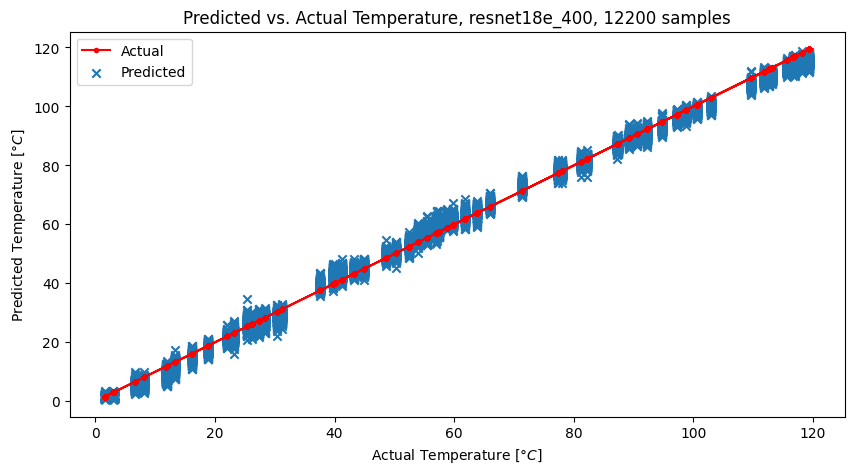

MSE: 4.991245746612549
RMSE: 2.2341096093550443
R2: 0.9961037635803223


In [10]:
from sklearn.metrics import r2_score

plt.figure(figsize=[10, 5])
plt.plot(Models['resnet18e_400'][1], Models['resnet18e_400'][1], '.-', c='red')
plt.scatter(Models['resnet18e_400'][1], Models['resnet18e_400'][0], marker='x')
plt.xlabel(r"Actual Temperature $[\degree C]$")
plt.ylabel(r"Predicted Temperature $[\degree C]$")
plt.title(f"Predicted vs. Actual Temperature, resnet18e_400, {Nsamples*61} samples")
plt.legend(['Actual', 'Predicted'])
plt.show()
print(f'MSE: {((Models['resnet18e_400'][0] - Models['resnet18e_400'][1]) ** 2).mean()}')
print(f'RMSE: {((Models['resnet18e_400'][0] - Models['resnet18e_400'][1]) ** 2).mean() ** 0.5}')
print(f'R2: {r2_score(Models['resnet18e_400'][1], Models['resnet18e_400'][0])}')

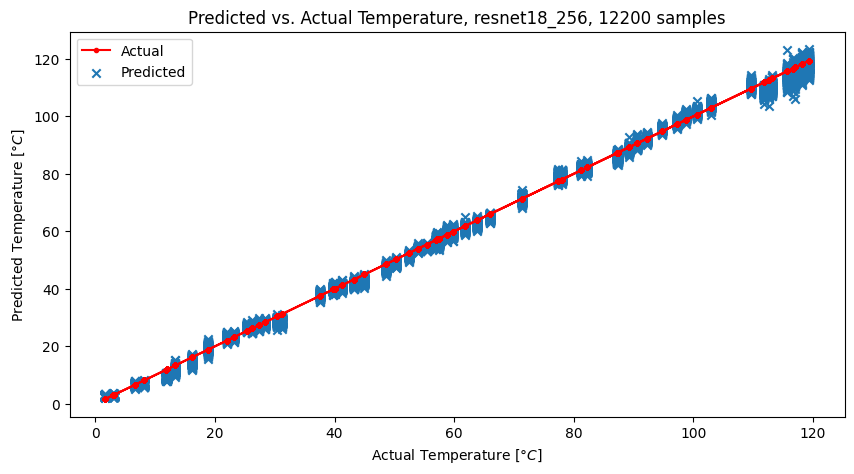

MSE: 2.9313230514526367
RMSE: 1.712110700700348
R2: 0.9977117776870728


In [11]:
from sklearn.metrics import r2_score

plt.figure(figsize=[10, 5])
plt.plot(Models['resnet18_256'][1], Models['resnet18_256'][1], '.-', c='red')
plt.scatter(Models['resnet18_256'][1], Models['resnet18_256'][0], marker='x')
plt.xlabel(r"Actual Temperature $[\degree C]$")
plt.ylabel(r"Predicted Temperature $[\degree C]$")
plt.title(f"Predicted vs. Actual Temperature, resnet18_256, {Nsamples*61} samples")
plt.legend(['Actual', 'Predicted'])
plt.show()
print(f'MSE: {((Models['resnet18_256'][0] - Models['resnet18_256'][1]) ** 2).mean()}')
print(f'RMSE: {((Models['resnet18_256'][0] - Models['resnet18_256'][1]) ** 2).mean() ** 0.5}')
print(f'R2: {r2_score(Models['resnet18_256'][1], Models['resnet18_256'][0])}')

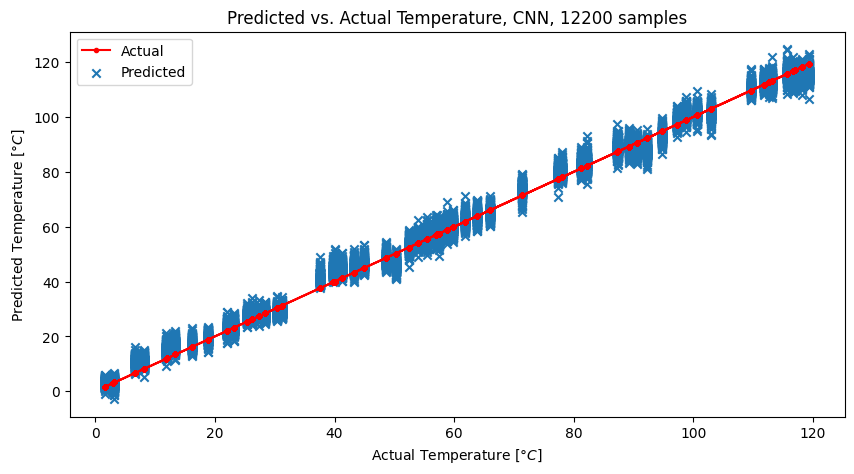

MSE: 7.535254955291748
RMSE: 2.745041885890222
R2: 0.9941178560256958


In [12]:
from sklearn.metrics import r2_score

plt.figure(figsize=[10, 5])
plt.plot(Models['CNN'][1], Models['CNN'][1], '.-', c='red')
plt.scatter(Models['CNN'][1], Models['CNN'][0], marker='x')
plt.xlabel(r"Actual Temperature $[\degree C]$")
plt.ylabel(r"Predicted Temperature $[\degree C]$")
plt.title(f"Predicted vs. Actual Temperature, CNN, {Nsamples*61} samples")
plt.legend(['Actual', 'Predicted'])
plt.show()
print(f'MSE: {((Models['CNN'][0] - Models['CNN'][1]) ** 2).mean()}')
print(f'RMSE: {((Models['CNN'][0] - Models['CNN'][1]) ** 2).mean() ** 0.5}')
print(f'R2: {r2_score(Models['CNN'][1], Models['CNN'][0])}')